# MNIST with TF2

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Load the MNIST dataset

from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train = X_train/255.
X_test = X_test/255.

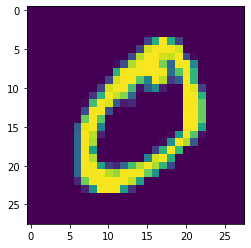

label:0


In [5]:
# Display one of the images

i = 1
img = X_train[i,:,:]
plt.imshow(img)
plt.show()
print(f'label:{Y_train[i]}')

In [6]:
img.shape

(28, 28)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D

model = Sequential([Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1) ),
                   MaxPooling2D((3,3)),
                   Flatten(),
                   Dense(10, activation='softmax')])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [9]:
#compile method
opt = tf.keras.optimizers.Adam(learning_rate = 0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=[acc, mae])

In [10]:
model.metrics

[]

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
#fit the model
history = model.fit(X_train[..., np.newaxis], Y_train, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 8s 20ms/step - loss: 1.2682 - sparse_categorical_accuracy: 0.6557 - mean_absolute_error: 4.3714
Epoch 2/20
235/235 [==============================] - 4s 15ms/step - loss: 0.2703 - sparse_categorical_accuracy: 0.9239 - mean_absolute_error: 4.3356
Epoch 3/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1869 - sparse_categorical_accuracy: 0.9456 - mean_absolute_error: 4.3732
Epoch 4/20
235/235 [==============================] - 4s 15ms/step - loss: 0.1482 - sparse_categorical_accuracy: 0.9594 - mean_absolute_error: 4.3558
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1245 - sparse_categorical_accuracy: 0.9648 - mean_absolute_error: 4.3699
Epoch 6/20
235/235 [==============================] - 2s 11ms/step - loss: 0.1098 - sparse_categorical_accuracy: 0.9686 - mean_absolute_error: 4.3675
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1038 - sparse_categoric

### plot training

In [13]:
history

In [14]:
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.734136,0.809467,4.373677
1,0.241917,0.931083,4.373677
2,0.176578,0.949183,4.373677
3,0.143314,0.959600,4.373677
4,0.123771,0.964950,4.373676


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

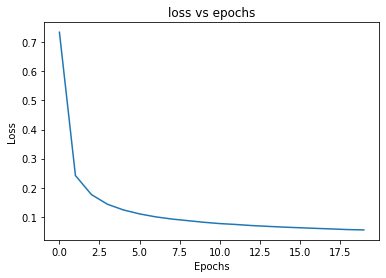

In [15]:
loss_plot = df.plot(y='loss', title = 'loss vs epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'accuracy')]

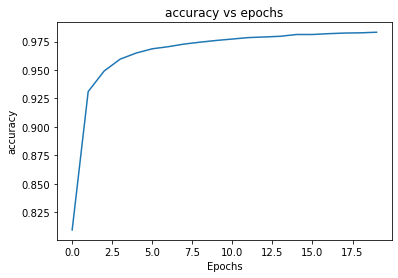

In [16]:
acc_plot = df.plot(y='sparse_categorical_accuracy', title = 'accuracy vs epochs', legend=False)
acc_plot.set(xlabel='Epochs', ylabel='accuracy')

### evaluate

In [17]:
test_loss, test_accuracy, test_mae = model.evaluate(X_test[..., np.newaxis], Y_test, verbose=2)

313/313 - 3s - loss: 0.0600 - sparse_categorical_accuracy: 0.9808 - mean_absolute_error: 4.3630


In [18]:
test_loss

0.060005445033311844

### Predict

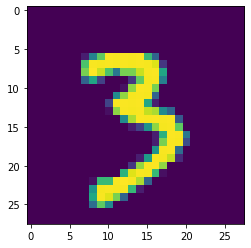

label:3


In [20]:
inx = 30

test_image = X_test[inx]
plt.imshow(test_image)
plt.show()
print(f'label:{Y_test[inx]}')

In [21]:
prediction = model.predict(test_image[np.newaxis,...,np.newaxis])

In [23]:
#print predictions
np.argmax(prediction)

3

# Thanks